#**Banking Dataset Classification**
###**Source:** [Kaggle](https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification/data)

###**Description:**
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

There are two datasets: train.csv with all examples (32950) and 21 inputs including the target feature, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

test.csv which is the test data that consists of 8238 observations and 20 features without the target feature

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

The dataset contains train and test data. Features of train data are listed below. And the test data have already been preprocessed.

### Feature Description Table

| Feature      | Feature Type               | Description                                                                                  |
|--------------|----------------------------|----------------------------------------------------------------------------------------------|
| age          | numeric                    | Age of a person                                                                              |
| job          | categorical, nominal       | Type of job ('admin.','blue-collar','entrepreneur','housemaid','management', etc.)          |
| marital      | categorical, nominal       | Marital status ('divorced','married','single','unknown')                                    |
| education    | categorical, nominal       | Education level ('basic.4y','basic.6y','basic.9y','high.school', etc.)                       |
| default      | categorical, nominal       | Has credit in default? ('no','yes','unknown')                                                |
| housing      | categorical, nominal       | Has housing loan? ('no','yes','unknown')                                                     |
| loan         | categorical, nominal       | Has personal loan? ('no','yes','unknown')                                                    |
| contact      | categorical, nominal       | Contact communication type ('cellular','telephone')                                          |
| month        | categorical, ordinal       | Last contact month of year ('jan', 'feb', ..., 'dec')                                        |
| day_of_week  | categorical, ordinal       | Last contact day of the week ('mon','tue','wed','thu','fri')                                 |
| duration     | numeric                    | Last contact duration in seconds (highly affects the target outcome)                         |
| campaign     | numeric                    | Number of contacts performed during this campaign                                            |
| pdays        | numeric                    | Days since last contact from a previous campaign (999 = not previously contacted)            |
| previous     | numeric                    | Number of contacts before this campaign                                                      |
| poutcome     | categorical, nominal       | Outcome of the previous campaign ('failure','nonexistent','success')                         |

### Target Variable

| Feature | Feature Type | Description                                      |
|---------|--------------|--------------------------------------------------|
| y       | binary       | Has the client subscribed a term deposit? ('yes','no') |


In [104]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn. preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [105]:
#Reading the dataset
data = pd.read_csv("/content/new_train.csv")

In [106]:
#Printing the dataset
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [107]:
##finding the datatypes,colums and rows /information of the data provided
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


From the info we can see
1. The data 32950 rows and 16 columns
2. There are no null values and has colomns with categorial data




In [108]:
#finding the mean,Standard deviation ,count, median for columns
data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


1. From describing data we can see few colomns have a vast diff between 75%(upper quartile region) and max (outer extreme) so there might be outliers present
2. So plotting boxplot for numerical colomns is neccasary for further analysis



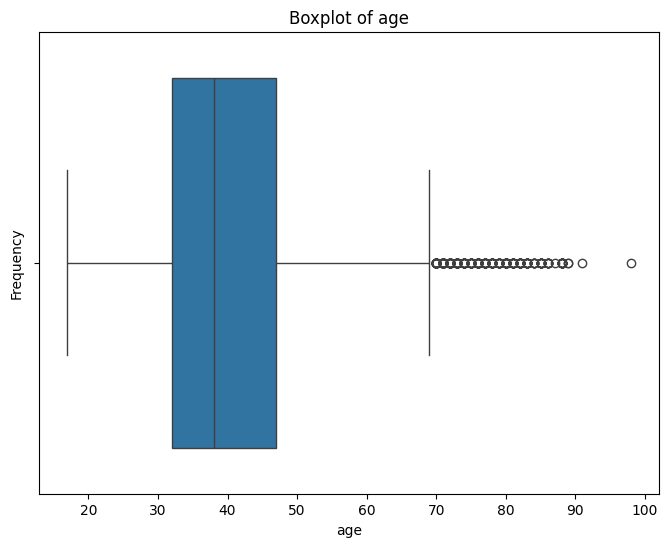

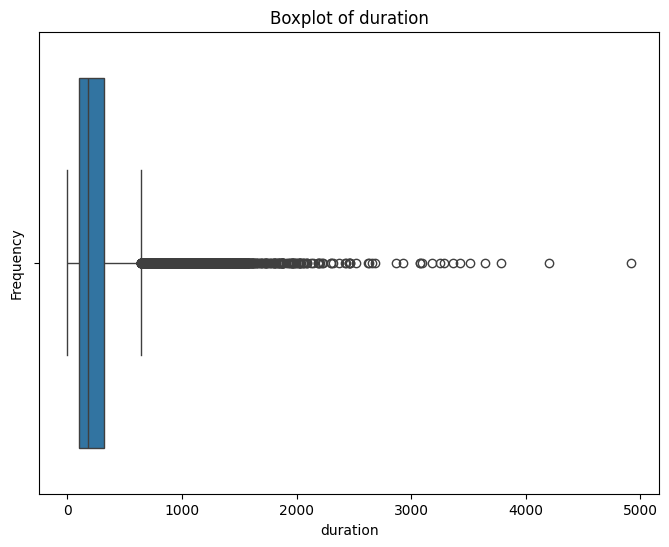

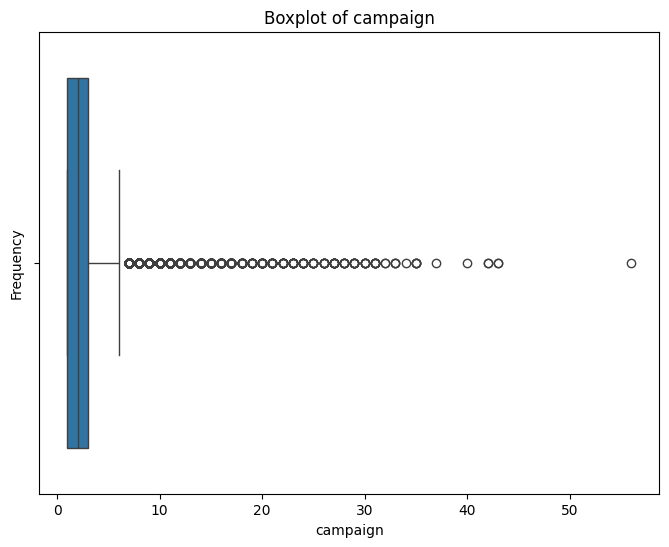

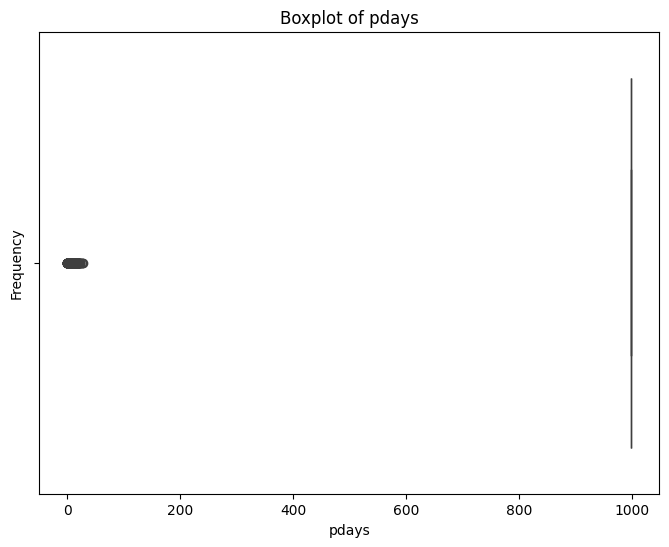

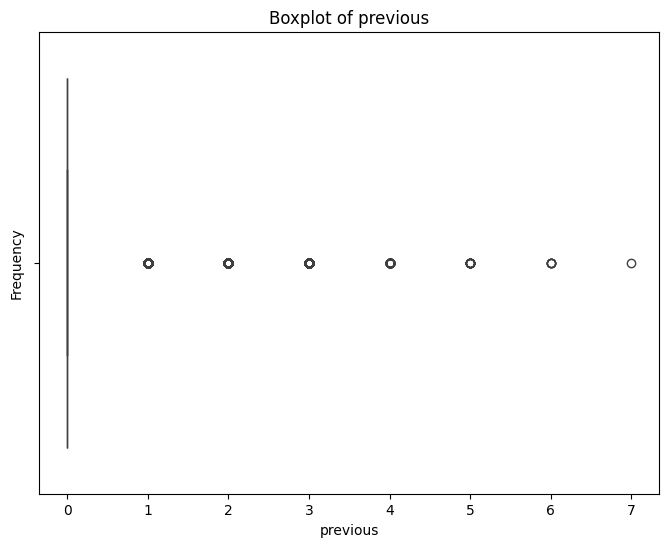

In [109]:
#boxplot for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From the boxplot
1. We can see few outliers present in age, duration and campain


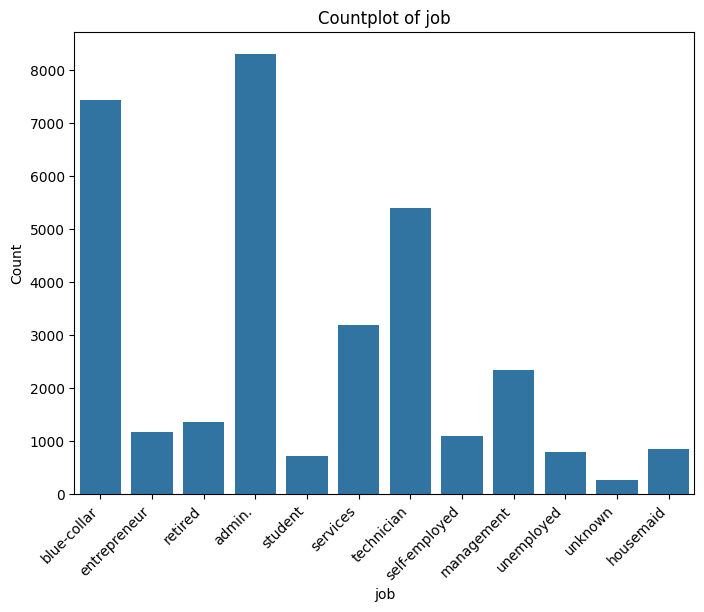

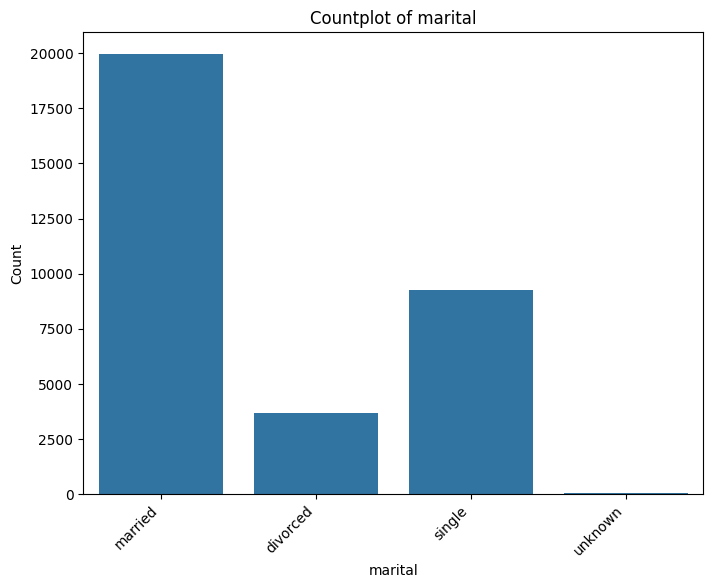

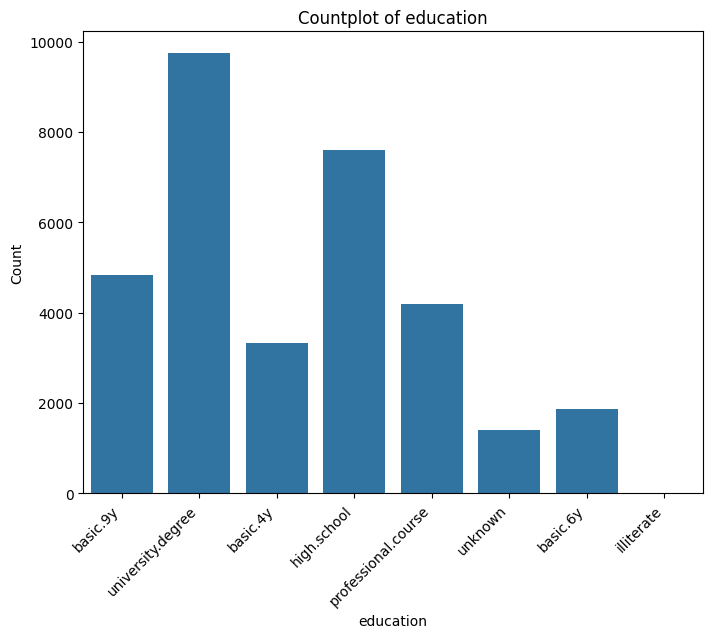

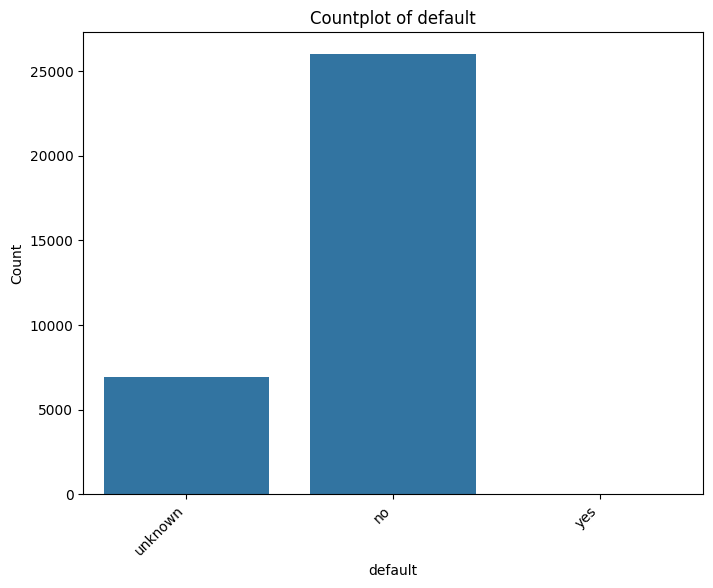

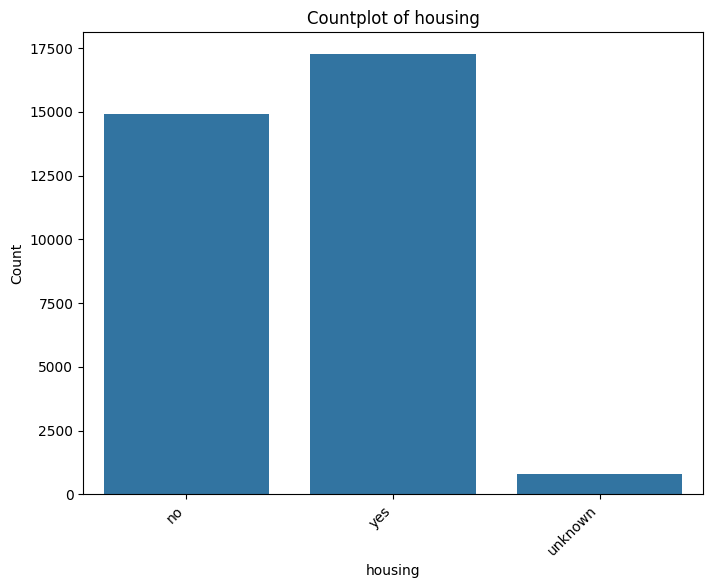

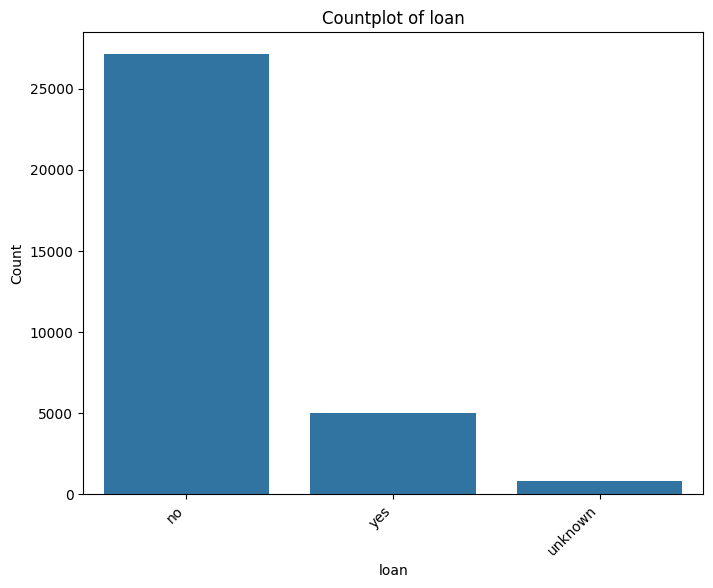

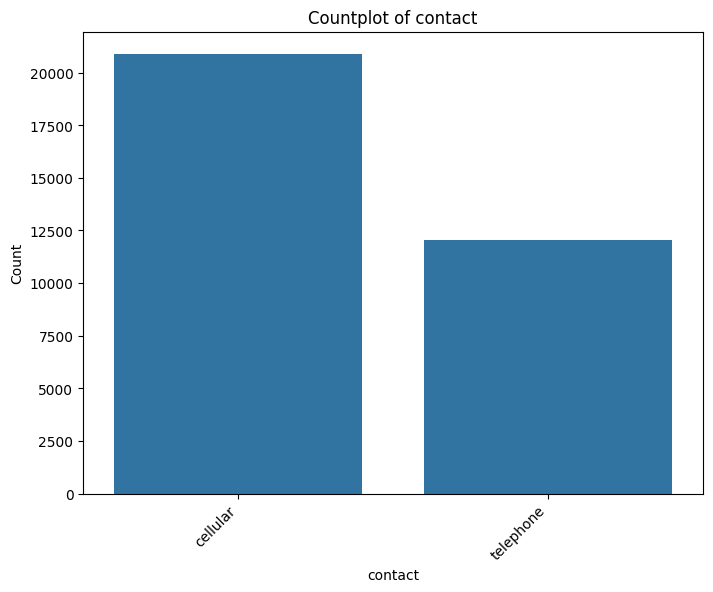

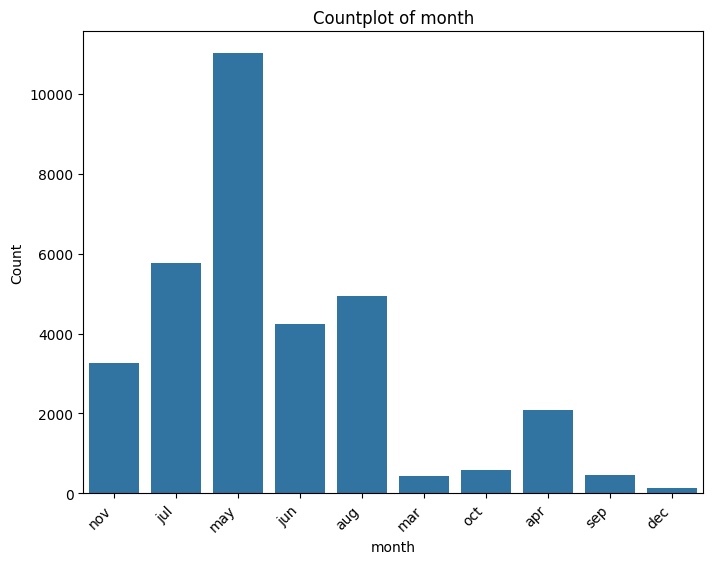

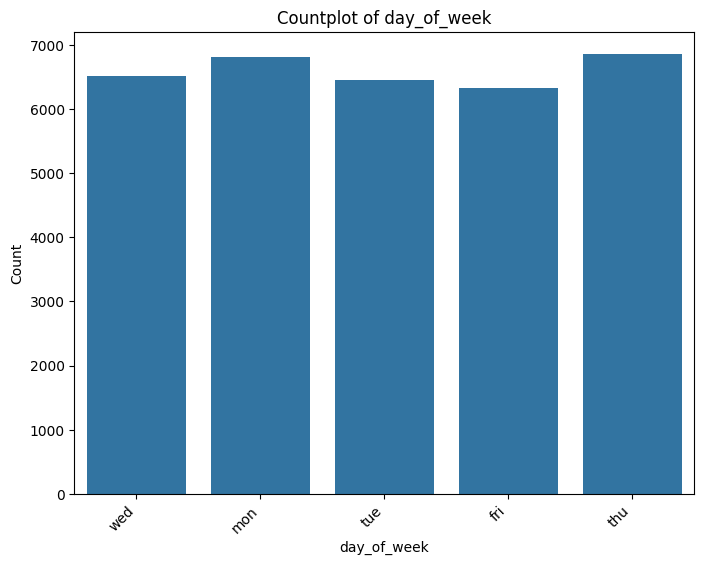

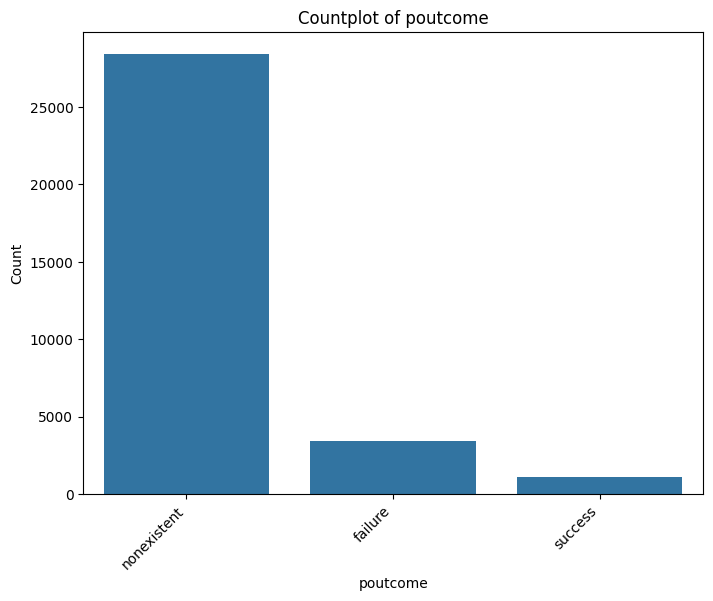

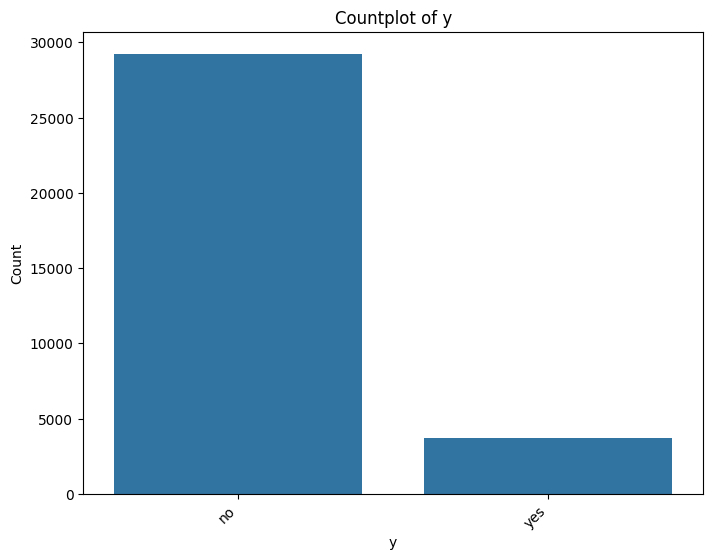

In [110]:
#Countplot for categorial colomns
for col in data.select_dtypes(include=['object']):  # Select categorical columns
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()



In [111]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Function to cap outliers using IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound) #This replaces values outside bounds
    return df

# Apply outlier removal to numerical columns
for col in data.select_dtypes(include=np.number):
  if col not in ['previous', 'pdays']:
    data = remove_outliers_iqr(data, col)
    data_capped = cap_outliers(data, col) #Now this function is defined


In [112]:
# Apply log transformation to columns with outliers
for col in data.select_dtypes(include=np.number):
  if col not in ['previous', 'pdays']:
    # Add a small constant to handle zero values
    data[col] = np.log1p(data[col])

1. Capping (Winsorization)
What it does:

* Replaces extreme values (outliers) with nearby percentile values (e.g., 5th and 95th percentiles).

* Left-tail capping: Values below the 5th percentile → set to 5th percentile.

* Right-tail capping: Values above the 95th percentile → set to 95th percentile.

* When to use:

   * Outliers are errors (e.g., sensor glitches).

   * You want to preserve data size (no deletions).
2. Log Transform


* Applies a logarithm (e.g., natural log ln(x)) to compress large values.

* Formula: X_new = log(X + 1) (to handle zeros).

* When to use:

  * Data is right-skewed (long tail on the right).

  * Outliers are natural but extreme (e.g., income, bean sizes).   

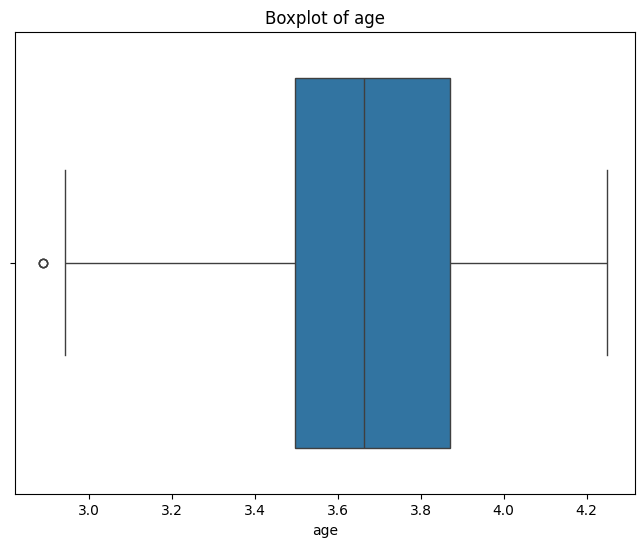

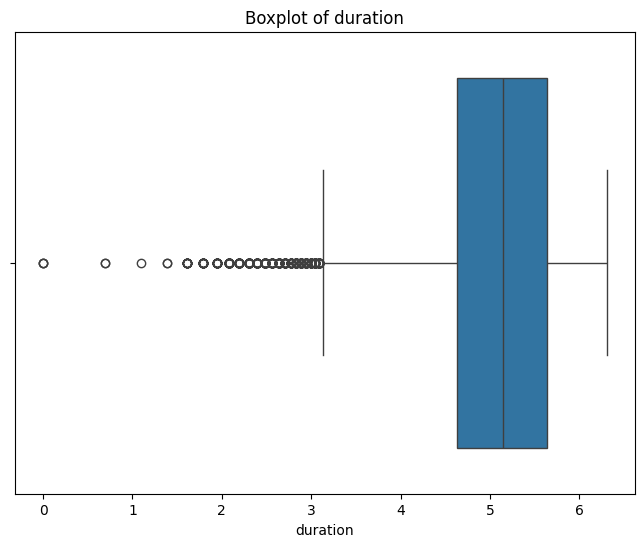

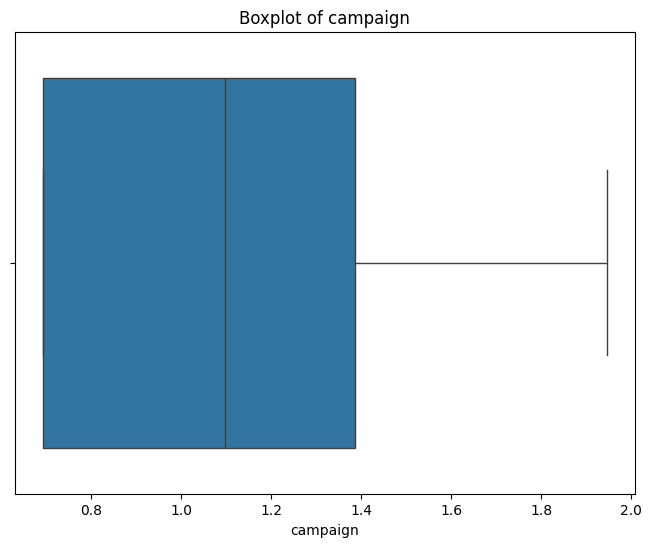

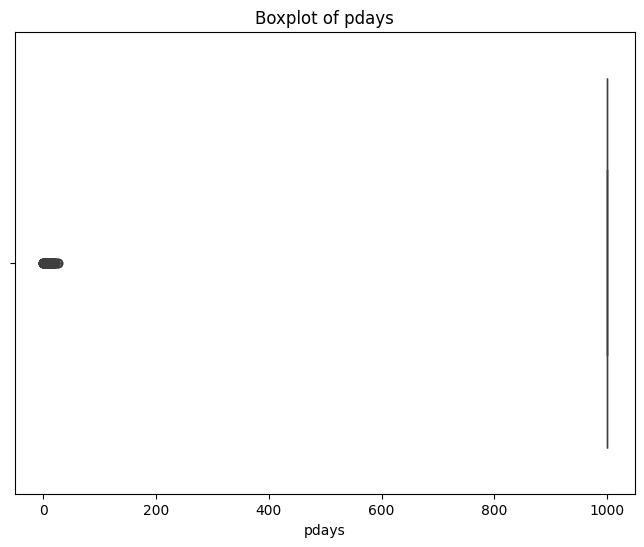

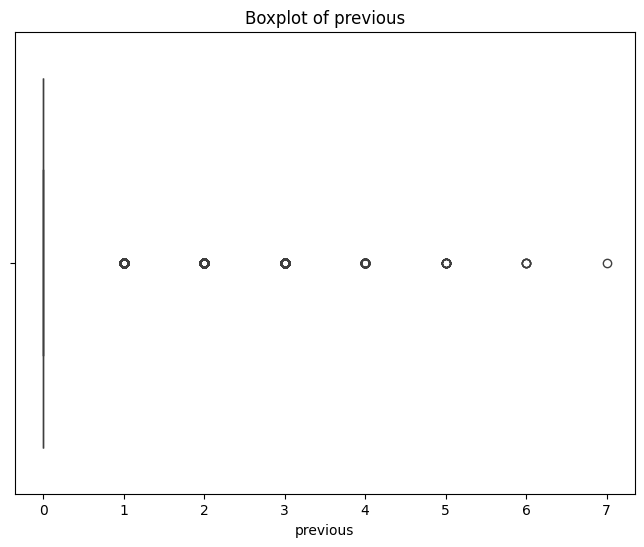

In [113]:
# Boxplot for all numerical columns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


1. So most of the outliers are fixed

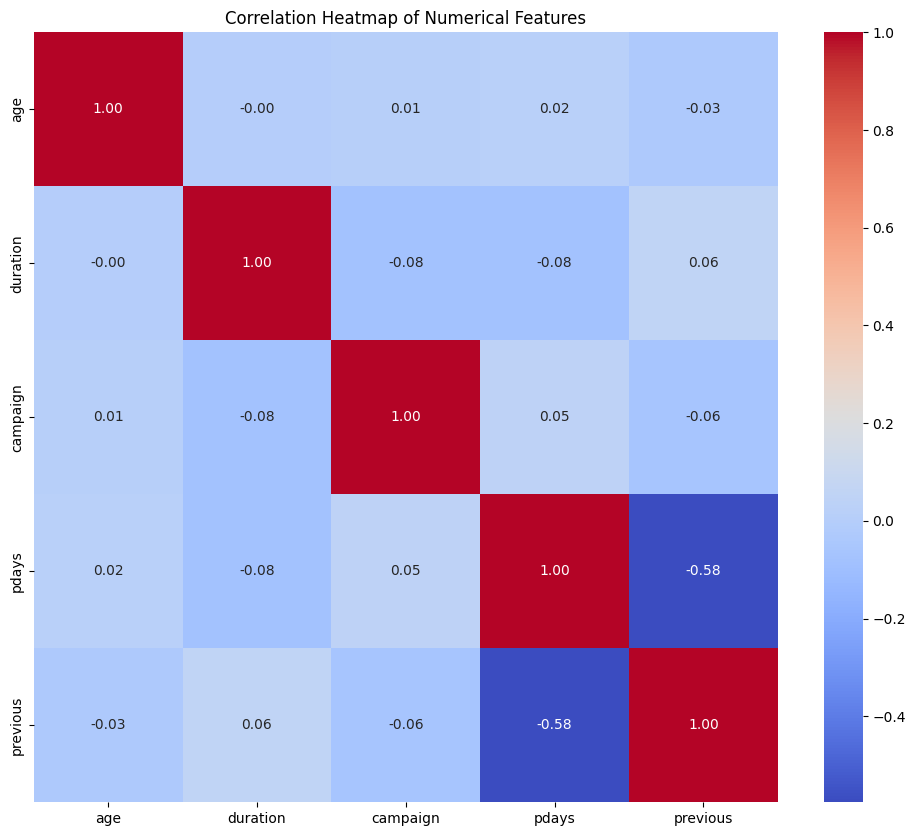

In [115]:
# Select numerical columns for correlation analysis
numerical_cols = data.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



There is no correlation between numerical featuers

In [116]:
# Initialize LabelEncoder
le = LabelEncoder()

# Iterate through each column in the DataFrame
for col in data.select_dtypes(include=['object']):
    # Fit and transform the categorical column
    data[col] = le.fit_transform(data[col])

In [117]:
# Displaying data types of all columns
data.dtypes

,0
age,float64
job,int64
marital,int64
education,int64
default,int64
housing,int64
loan,int64
contact,int64
month,int64
day_of_week,int64


In [118]:
#Print the duplicated rows
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
1923,3.688879,0,1,6,0,0,0,0,7,3,4.820282,1.098612,999,0,1,0
12252,3.610918,5,1,7,0,0,0,1,3,2,4.488636,0.693147,999,0,1,0
20067,3.583519,0,1,6,0,2,0,0,6,0,5.855072,1.609438,999,0,1,0
24831,3.737670,9,1,5,0,2,0,0,1,3,4.852030,0.693147,999,0,1,0
28456,4.025352,7,1,3,1,0,0,0,1,1,3.526361,0.693147,999,0,1,0
29543,3.871201,9,0,3,0,2,0,0,3,2,3.784190,1.386294,999,0,1,0
31198,3.526361,0,1,6,0,2,0,0,1,0,6.306275,0.693147,999,0,1,1
32607,3.688879,1,1,1,0,0,0,1,6,2,4.828314,0.693147,999,0,1,0
32660,3.526361,0,1,6,0,2,0,1,6,0,6.306275,0.693147,999,0,1,0


1. We can observe that there are 68 rows with duplicate values

In [119]:
data.duplicated().sum()

np.int64(9)

In [120]:
#Droping duplicate colomns
data_clean = data.drop_duplicates()

1. So droping duplicate colomns to aviod biasing or overfitting

In [121]:
#Printing the colomns and rows in dataset
data_clean.shape

(28444, 16)

In [123]:
# Seperating features (X) and target (y)
X = data_clean.drop('y', axis=1)
y = data_clean['y']

In [124]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs']  # Optimization algorithm
}

# Initialize Logistic Regression model
logreg = LogisticRegression()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')  # Use 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_logreg_model = grid_search.best_estimator_

print(f"Best hyperparameters: {best_params}")

# Train the Logistic Regression model with the best hyperparameters
best_logreg_model.fit(X_train, y_train)


Best hyperparameters: {'C': 0.1, 'solver': 'liblinear'}


LogisticRegression(C=0.1, solver='liblinear')

1. The chosen Best hyperparameters here are : {'C': 0.1, 'solver': 'liblinear'}


1. C: This is the inverse of the regularization strength. Smaller values mean stronger regularization.

  * Helps prevent overfitting by penalizing large coefficients.

  * Trying a range of values (from 0.001 to 100) helps find the best balance.

2. solver: These are different algorithms used to find the best model parameters.

  * 'liblinear': Good for small datasets and L1 regularization.

  * 'saga': Supports both L1 and L2 penalties, works well on large datasets.

  * 'newton-cg' and 'lbfgs': Better for larger datasets, work only with L2 penalty.
3. GridSearchCV: Automates testing all combinations of hyperparameters from param_grid.

  * cv=5: Uses 5-fold cross-validation:
     * Splits the training data into 5 parts.
     * Trains on 4 parts and validates on the remaining 1.
     * Repeats this process 5 times (each fold acts as validation once).

  * scoring='accuracy': Uses accuracy as the metric to evaluate performance
4. grid_search.best_params_: Shows the best combination of C and solver that gave the highest accuracy.

5. grid_search.best_estimator_: Gives the actual trained Logistic Regression model with those optimal hyperparameters.  

In [127]:
# Make predictions on the test set
y_pred = best_logreg_model.predict(X_test)
y_prob = best_logreg_model.predict_proba(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

# Check if the problem is binary or multi-class
if len(best_logreg_model.classes_) == 2:
    # For binary classification, calculate ROC AUC using the positive class probabilities
    roc_auc = metrics.roc_auc_score(y_test, y_prob[:, 1])
else:
    # For multi-class classification, use 'ovr'
    roc_auc = metrics.roc_auc_score(y_test, y_prob, multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.9312708736157497
Precision: 0.9192509450855583
Recall: 0.9312708736157497
F1-score: 0.9146958579752401
ROC-AUC: 0.8697958084562986


🔹 Accuracy: 0.931
\
About 93.1% of test samples were correctly classified.
✅ High accuracy means overall good prediction performance.

🔹 Precision: 0.919
When the model predicts a certain class, it is correct about 91.9% of the time.
✅ High precision means few false positives (i.e., the model doesn't "guess" wrong often).

🔹 Recall: 0.931
The model correctly identified 93.1% of the actual positive instances (or correctly found members of each class).
✅ High recall means the model is sensitive and doesn’t miss many correct cases.

🔹 F1 Score: 0.914
This is the harmonic mean of precision and recall. At ~0.914, it shows that your model has a good balance between the two.
✅ It’s particularly useful if your classes are imbalanced or if you care about both precision and recall equally.

🔹 ROC-AUC: 0.869
The model is moderately good at ranking positive instances higher than negative ones. So the model is not exceptionally well in distingusing between the target class , but moderately performs it



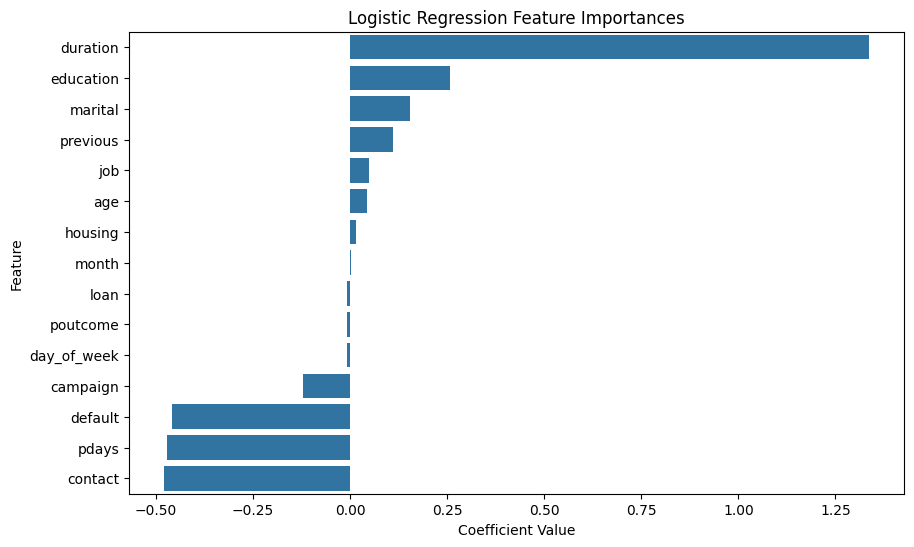

In [129]:
# Get feature importances (coefficients)
feature_importances = best_logreg_model.coef_
if len(feature_importances) > 1:
    feature_importances = np.mean(feature_importances, axis=0)

# Create a DataFrame to visualize coefficients
# Reshape feature_importances to a 1D array
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': feature_importances.flatten()}) #Flatten to make it 1D
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Visualize coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df)
plt.title('Logistic Regression Feature Importances')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

1. Top Positive Influencer: duration — longer calls = higher success (but can leak future info).

2. Other positives: education, marital, previous, job, age.

3. Top Negatives: default, pdays, contact, campaign — these reduce success odds.

4. Features like loan, month, housing had little effect.